Probemos buscar el mínimo de la función; ejercicio 01

$$ f(x1, x2) = 100(x2 − x1^2)^2 + (1 − x1)^2 $$

In [1]:
import numpy as np
from pylab import *
import copy

In [34]:
# r es el vector X,Y; donde r[0] es X y r[1] es Y
def test_fn(r):
  return 100 * (r[1] - r[0] ** 2) ** 2 + (1 - r[0]) ** 2

# esta funcion esta calculada a mano, haciendo la derivada
def grad(r):
  return [-400 * r[0] * (r[1] - r[0] ** 2) - 2 * (1 - r[0]), 200 * (r[1] - r[0] ** 2)]

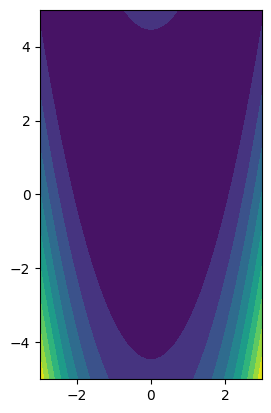

In [35]:
xx = np.linspace(-3, 3, num=100)
yy = np.linspace(-5, 5, num=200)
X, Y = np.meshgrid(xx, yy, indexing='ij')
rr = np.array([[(x, y) for x in xx] for y in yy])

contourf(X, Y, test_fn([X, Y]), levels=10)
gca().set_aspect('equal')

In [ ]:
# Gradiente descendiente - con step constante
# Seteamos la cantidad de iteraciones (pasos) a realizar
Nsteps = 10000000

#Seteamos nuestro Alfa (tasa de aprendizaje)
step = 0.0001

xk = np.zeros(Nsteps + 1)
yk = np.zeros(Nsteps + 1)
fk = np.zeros(Nsteps + 1)

# El punto inicial es
xk[0] = 1.2
yk[0] = 1.2
fk[0] = test_fn((xk[0], yk[0]))

# Iteramos Nsteps veces, para obtener el nuevo punto
for ii in range(Nsteps):
  xk[ii + 1] = xk[ii] - step * grad((xk[ii], yk[ii]))[0]
  yk[ii + 1] = yk[ii] - step * grad((xk[ii], yk[ii]))[1]

  fk[ii + 1] = test_fn((xk[ii + 1], yk[ii + 1]))

# Punto minimo es
[xk[Nsteps], yk[Nsteps]]

contourf(X, Y, test_fn([X, Y]), levels=15)
plot(xk, yk, color='C2', marker='o')
gca().set_aspect('equal')

# El problema aca es que al mandarle un paso de 0.0001, el algoritmo converge muy lentamente.
# Si le mandamos un paso de 0.1, converge mucho mas rapido, pero diverge

In [63]:
# Gradiente descendiente - con backtracking
# Seteamos la cantidad de iteraciones (pasos) a realizar
Nsteps = 100
xk = np.zeros(Nsteps + 1)
yk = np.zeros(Nsteps + 1)
fk = np.zeros(Nsteps + 1)

#Seteamos nuestro Alfa (tasa de aprendizaje), c y beta
c = 0.33
beta = 0.5

# El punto inicial es
xk[0] = 1.2
yk[0] = 1.2
fk[0] = test_fn((xk[0], yk[0]))


# Iteramos Nsteps veces, para obtener el nuevo punto
for ii in range(Nsteps):

    # Usando Backtracking calculamos nuestro nuevo step
    step = 1
    grad_k = grad((xk[ii], yk[ii]))

    while test_fn((xk[ii] - step * grad_k[0], yk[ii] - step * grad_k[1])) > (test_fn((xk[ii], yk[ii])) + step * c * (grad_k @ np.array(grad_k) * -1)):
        step = step * beta

    xk[ii + 1] = xk[ii] - step * grad((xk[ii], yk[ii]))[0]
    yk[ii + 1] = yk[ii] - step * grad((xk[ii], yk[ii]))[1]
    fk[ii + 1] = test_fn((xk[ii + 1], yk[ii + 1]))

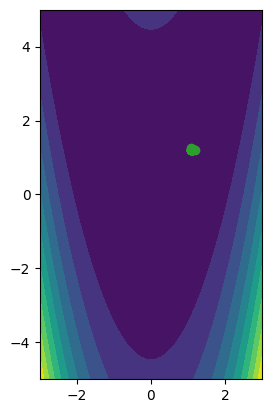

In [64]:
contourf(X, Y, test_fn([X, Y]), levels=10)
plot(xk, yk, color='C2', marker='o')
gca().set_aspect('equal')

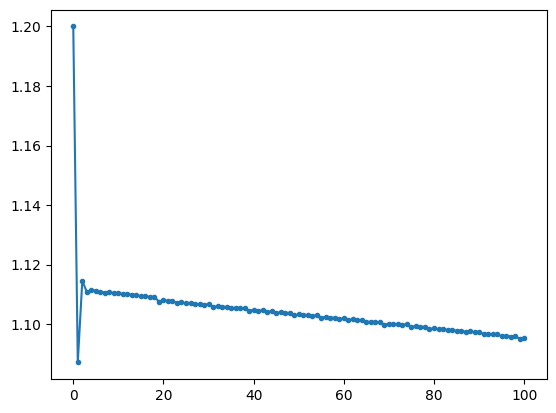

In [65]:
plot(xk, marker='.')

In [39]:
# Gradiente descendiente - con backtracking
# Seteamos la cantidad de iteraciones (pasos) a realizar
Nsteps = 1000
xk = np.zeros(Nsteps + 1)
yk = np.zeros(Nsteps + 1)
fk = np.zeros(Nsteps + 1)

#Seteamos nuestro Alfa (tasa de aprendizaje), c y beta
c = 0.33
beta = 0.5

# El punto inicial es
xk[0] = -1.2
yk[0] = 1
fk[0] = test_fn((xk[0], yk[0]))


# Iteramos Nsteps veces, para obtener el nuevo punto
for ii in range(Nsteps):

    # Usando Backtracking calculamos nuestro nuevo step
    step = 1
    grad_k = grad((xk[ii], yk[ii]))

    while test_fn((xk[ii] - step * grad_k[0], yk[ii] - step * grad_k[1])) > (test_fn((xk[ii], yk[ii])) + step * c * (grad_k @ np.array(grad_k) * -1)):
        step = step * beta

    xk[ii + 1] = xk[ii] - step * grad((xk[ii], yk[ii]))[0]
    yk[ii + 1] = yk[ii] - step * grad((xk[ii], yk[ii]))[1]
    fk[ii + 1] = test_fn((xk[ii + 1], yk[ii + 1]))

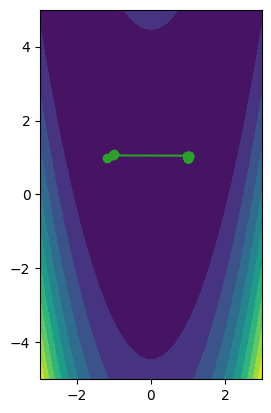

In [43]:
contourf(X, Y, test_fn([X, Y]), levels=10)
plot(xk, yk, color='C2', marker='o')
gca().set_aspect('equal')

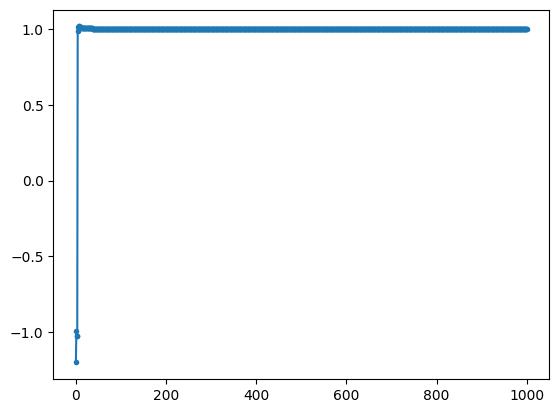

In [44]:
plot(xk, marker='.')